# Model creation notebook
This notebook countains all info about building the ML models to predict temperature and CO2 emissions. Note that 4 models will be used in this notebook :  linear regression,lasso regression, polynomial regression and Support Vector Machine Regressor



# Libraries importation 

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import svm
import pandas as pd


# Meteo dataset importation and exploring normal distribution of the unscalled data
Now we are importing the meteo dataset and exploring how is the distribution if we don't yet scale the data

/tmp/ipykernel_4630/3800929642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected["mean_temperature"] = (selected["Tmax(°C)"]+selected["Tmin(°C)"])/2


Text(0.5, 0, 'unscalled normal distribution of temperature')

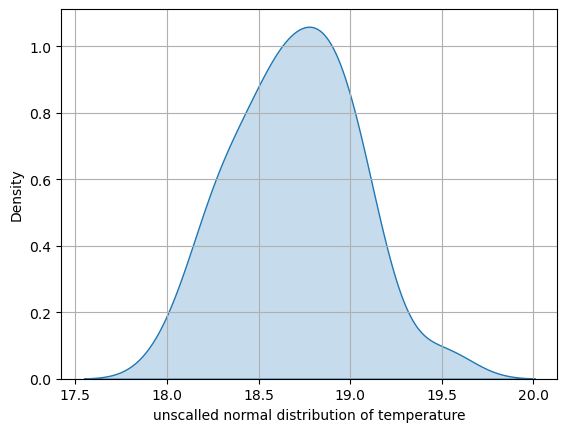

In [2]:
meteo = pd.read_excel("mto.xlsx")
meteo = meteo.dropna()
selected = meteo[["date","Tmin(°C)","Tmax(°C)"]]
selected["mean_temperature"] = (selected["Tmax(°C)"]+selected["Tmin(°C)"])/2
temperature = selected["mean_temperature"].groupby(by = selected["date"].dt.year).mean()
plt.grid()
sns.kdeplot(x = temperature,fill = True)
plt.xlabel("unscalled normal distribution of temperature")

As we can see major parts of the temperature dataset are located between 18°C and 19.5 °C

# Greenhouse Dataset importation
Now we are doing the same for CO2 greenhouse gaz 

Text(0.5, 0, 'Unscalled normal distribution of CO2 emission ')

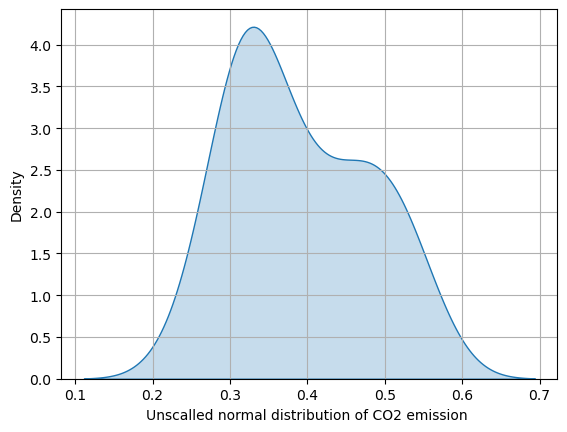

In [3]:

ghg = pd.read_csv("ghg.csv")
meteo = meteo.dropna()
indexes = np.arange(1993,2023).astype("str")
population  = 3.5 #this is the average population number of the analamanga region
emissions =((np.array(ghg[indexes]).T)*3.5).reshape((30,))
plt.grid()
sns.kdeplot(x = emissions,fill = True)
plt.xlabel("Unscalled normal distribution of CO2 emission ")

# Scalling function 
Now we are scalling the datasets with standarization

In [4]:
def scale(train,test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(train)
    x_test_scaled = scaler.transform(test)
    return {"train_scaled":x_train_scaled,"test_scaled":x_test_scaled}

# Plotting scalled data thourgh kfold cross validation

Here is the representation of the distribution of CO2 scalled

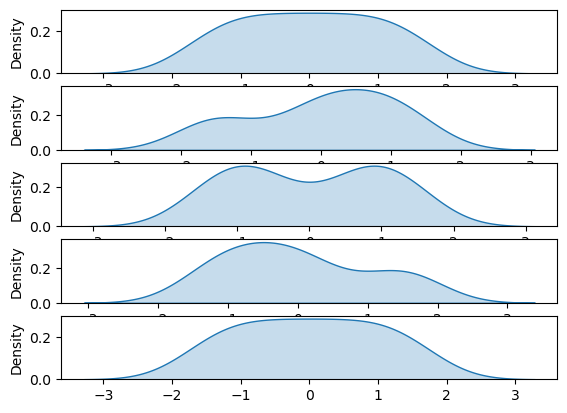

In [5]:
cv = KFold(n_splits=5) 
for i,(train,test) in enumerate(cv.split(emissions)):
    plt.subplot(5,1,i+1)
    sns.kdeplot(x = np.array(scale(np.array(train).reshape((24,1)),np.array(test).reshape((6,1)))["train_scaled"]).reshape((24,)),fill = True)

And here is the case of temperature

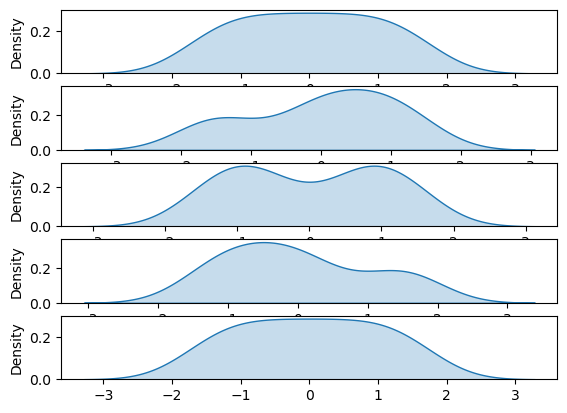

In [6]:
cv = KFold(n_splits=5) 
for i,(train,test) in enumerate(cv.split(temperature)):
    plt.subplot(5,1,i+1)
    sns.kdeplot(x = np.array(scale(np.array(train).reshape((24,1)),np.array(test).reshape((6,1)))["train_scaled"]).reshape((24,)),fill = True)

# Building linear regression model
Now we are building a linear regression model to predict temperature thourgh co2 emission data

Mean r² of the model :0.541977117751321
Mean RMSE of the model : 0.5472653251184261°C
Std of the score : 0.01737361831757251
std of the error : 0.20204655853191214°C


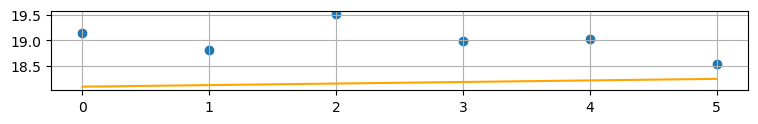

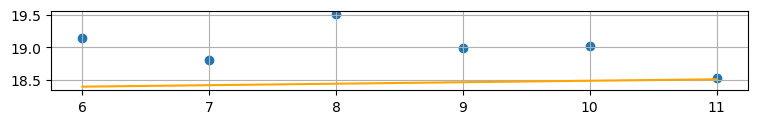

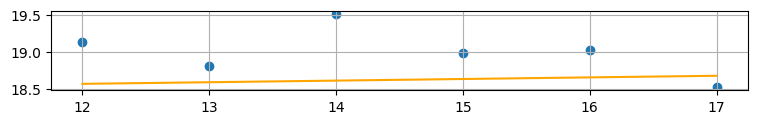

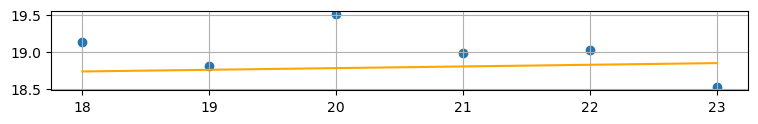

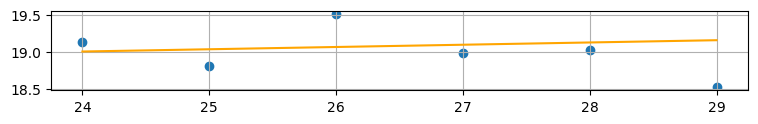

In [7]:
cv = KFold(n_splits=5) 
score = []
rmse = []
for i,(train,test) in enumerate(cv.split(emissions)):
    train = np.array(train).reshape((24,1))
    test = np.array(test).reshape((6,1))
    model = LinearRegression()
    model.fit(np.array(scale(train,test)["train_scaled"]).reshape((24,1)),temperature[0:24])
    score.append(model.score(np.array(scale(train,test)["train_scaled"]).reshape((24,1)),temperature[0:24]))
    predicted = model.predict(scale(train,test)["test_scaled"])
    mse = mean_squared_error(predicted,temperature[24:])
    rmse.append(np.sqrt(mse))
    plt.figure(figsize = (9,6))
    plt.subplot(5,1,i+1)
    plt.grid()
    plt.scatter(test.reshape((6,)) ,temperature[24:])
    plt.plot(test.reshape((6,)),predicted,color = "orange")

    

    
print(f"Mean r² of the model :{np.mean(score)}")
print(f"Mean RMSE of the model : {np.mean(rmse)}°C")
print(f"Std of the score : {np.std(score)}")
print(f"std of the error : {np.std(rmse)}°C")


As we can see, the linear regression model have an accuracy of 54%, it predicted 54% of the data, and thos accuracy may vary to 1.7% each 6 years. And the error may vary to 0.19°C.

Now we are building another Linear Regression model to predict carbon dioxyde emission through temperature dataset.

Mean r² of the model :0.3055620210684881
Mean RMSE of the model : 0.05991275437267968 MtCO2equ
Std of the score : 0.06402619180109445
std of the error : 0.02813458532992931 MtCO2equ


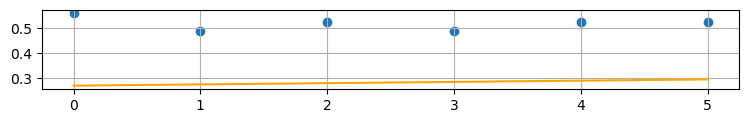

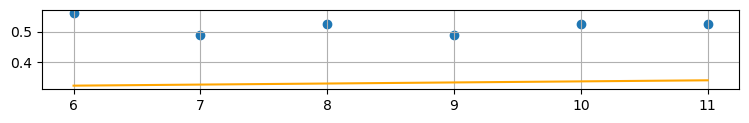

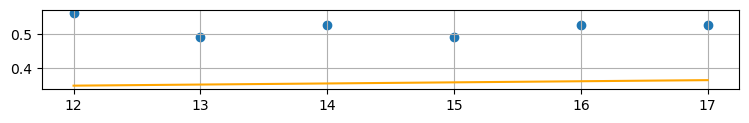

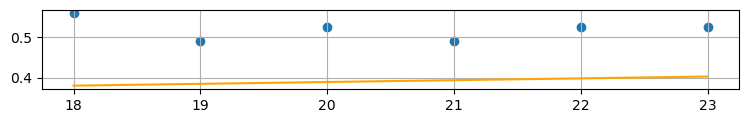

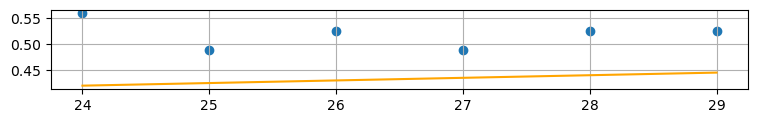

In [8]:
cv = KFold(n_splits=5) 
score = []
rmse = []
for i,(train,test) in enumerate(cv.split(temperature)):
    train = np.array(train).reshape((24,1))
    test = np.array(test).reshape((6,1))
    model = LinearRegression()
    model.fit(np.array(scale(train,test)["train_scaled"]).reshape((24,1)),emissions[0:24])
    score.append(model.score(np.array(scale(train,test)["train_scaled"]).reshape((24,1)),emissions[0:24]))
    predicted = model.predict(scale(train,test)["test_scaled"])
    mse = mean_squared_error(predicted,emissions[0:6])
    rmse.append(np.sqrt(mse))
    plt.figure(figsize = (9,6))
    plt.subplot(5,1,i+1)
    plt.grid()
    plt.scatter(test.reshape((6,)) ,emissions[24:])
    plt.plot(test.reshape((6,)),predicted,color = "orange")

    
print(f"Mean r² of the model :{np.mean(score)}")
print(f"Mean RMSE of the model : {np.mean(rmse)} MtCO2equ")
print(f"Std of the score : {np.std(score)}")
print(f"std of the error : {np.std(rmse)} MtCO2equ")

As we can see, accuracy is 0.3 it means the model predicted 30% of the data, this accuracy may increase or decrease by 6% each 6years. The error may change each 6 years by 0.02MtCO2 equivalent.

# adding and building lasso regression model
After testing a linear regression model with an accuracy equal to 50%, let's now test lasso regression and find if it's more accurate for our dataset.

We start by using nested cross validation to evalute the best alpha hyperparameter to the model.

In [97]:
params = {"alpha":[10**-7,0.0000001,0.00001,0.0001,0.001,0.01,0.1,1,10]}
inner_cv = GridSearchCV(estimator = Lasso(),param_grid=params,cv = 5)
inner_cv.fit(X = emissions.reshape((30,1)),y = temperature)
outer_cv = KFold(n_splits = 5)
scores = []
for i,(train,test) in enumerate(outer_cv.split(emissions.reshape((30,1)))):
    x = scale(np.array(train).reshape((24,1)),np.array(test).reshape((6,1)))["train_scaled"]
    x_test = scale(np.array(train).reshape((24,1)),np.array(test).reshape((6,1)))["test_scaled"]
    score = cross_val_score(estimator = inner_cv,X = x,y = temperature[:24],cv = 5,scoring = "r2")
    scores.append(np.mean(score))
    
print(np.mean(scores))


-0.890543047633795


As we can see, the score is really worse than below 0.0 so we can say the model is overfitting, lasso regression is an inapropriate model to predict temperature through carbon dioxyde emissions.

Now let's try polynomial regression.

In [102]:
# pipeline creation for transforming into polynomial features
pipeline = Pipeline([("poly",PolynomialFeatures(include_bias=False)),
    ("linreg",LinearRegression())
])

params = {"poly__degree":[2,3,4,5,6,7,8,9,10]}
inner_cv = GridSearchCV(estimator = pipeline,param_grid = params,cv = 5)
inner_cv.fit(emissions.reshape((30,1)),temperature)
outer_cv = KFold(n_splits = 5)
scores = []
for i,(train,test) in enumerate(outer_cv.split(emissions.reshape((30,1)))):
    x = scale(np.array(train).reshape((24,1)),np.array(test).reshape((6,1)))["train_scaled"]
    x_test = scale(np.array(train).reshape((24,1)),np.array(test).reshape((6,1)))["test_scaled"]
    score = cross_val_score(estimator = inner_cv,X = x,y = temperature[:24],cv = 5,scoring = "r2")
    scores.append(np.mean(score))
print(inner_cv.best_params_)
print(np.mean(scores))

{'poly__degree': 2}
-0.3375769520049755


As we can see, the polynomial regression is as bad as the lasso regression,so we cannot validate these models.